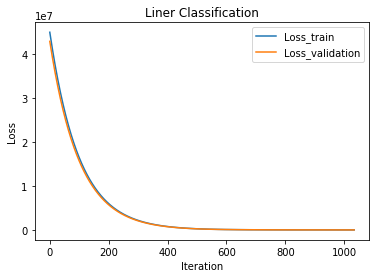

0.808695652174


In [12]:
import sklearn
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

dataset_file = "./data/australian_scale"
    
def load_data(file_path):  
#     读取libsvm格式数据  
    x, y = load_svmlight_file(file_path)  
    return x, y

def compute_loss(X, y, theta, lamda):
    m = y.shape[0]
    C = np.maximum(np.ones(m) - X.dot(theta), np.zeros(m))
    loss = np.sum(C) + lamda * LA.norm(theta, 2) ** 2 / 2
    return loss

#    draw the result
def draw_plot(Loss_train, Loss_validation):
    plt.plot(Loss_train, label="Loss_train")
    plt.plot(Loss_validation, label="Loss_validation") 
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.title("Liner Classification")
    plt.show()

def get_accuracy(X, y, theta):
    preY = X.dot(theta)
    count = np.sum(preY * y > 0)
    Accuracy = count / float(X.shape[0])
    return Accuracy
  
def liner_classification():
    X, y = load_data(dataset_file)
#     随机抽取测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
#     定义超参数
    alpha = 1
    lamda = 0.01
    epoch = 3
    num_iter = X_train.shape[0]
    theta = np.zeros((X_train.shape[1], 1))
#    用于存储历史误差
    loss_train = np.zeros((num_iter * epoch, 1))
    loss_validation = np.zeros((num_iter * epoch, 1)) 
    accuracy_validation = np.zeros((num_iter * epoch, 1)) 

#     优化theta,回归梯度下降  
    y_train = y_train.reshape((-1,1))
    y_test = y_test.reshape((-1,1))
    Xy_train = y_train.T * X_train
    for i in range(0, epoch):
        for iter in range(0, num_iter):
            # 对loss求导
            theta -= alpha * (- Xy_train.T.dot(Xy_train.dot(theta) <= 1) + theta * lamda)
            
            loss_train[i * num_iter + iter] = compute_loss(X_train, y_train, theta, lamda)
            loss_validation[i * num_iter + iter] = compute_loss(X_test, y_test, theta, lamda)
    
    draw_plot(loss_train, loss_validation)
    Accuracy = get_accuracy(X_test, y_test, theta)
    print(Accuracy)

if __name__ == "__main__":
    liner_classification()